#### Background

 ***   
 Sendy is the delivery partner for moving packages in Kenya. Sendy provides an app and web platform that enables (small) businesses to connect with drivers and request ondemand or scheduled package delivery services anytime, any day, 24/7. Partnership is the foundation of what we do. 
By partnering with Drivers and Businesses, we empower individuals to grow their livelihood. We do this by building a platform that is simple, transparent, and user Centric. Our goal is to be the preferred delivery partner in Africa.
 ***   

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Case Study.xlsx", sheet_name ="Querry result")
df.head(3)

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Placement time t,Confirmation Day,confirmation Time2,Cancellation Day,cancellation Time T,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
0,Personal,NaN,Bike,Express,android,No driver has been allocated to my request.,Customer,Monday,5:55PM,17,NaN,NaN,Monday,17,5:56PM,9,-1.313053,36.841437,OnDemAND
1,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,Monday,12:26PM,12,Monday,12:27PM,Monday,12,12:28PM,14,-1.318959,36.853394,OnDemAND
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,Monday,1:21PM,13,Monday,1:21PM,Monday,13,1:47PM,16,-1.313854,36.706867,OnDemAND


In [3]:
df.isna().sum()

Personal or Business       0
Business Number         3334
Vehicle Type               0
Standard or Express        5
Platform                   0
Cancel Reason              0
Cancelled by               0
Placement Day              0
Placement Time             0
Placement time t           0
Confirmation Day        3516
confirmation Time2      3516
Cancellation Day           0
cancellation Time T        0
Cancellation Time          0
Distance (KM)              0
Pickup Lat                 0
Pickup Long                0
scheduled                  0
dtype: int64

In [4]:
dft = pd.read_excel("Case Study.xlsx", sheet_name ="Missing Cancel Reason")
dft.head(3)

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
0,Personal,NaN,Bike,Express,ios,NaN,Customer,1,15:23:44,1.0,16:40:47,1,16:43:50,4,-1.299370,36.822107,OnDemAND
1,Business,20680.0,Bike,Express,desktop,NaN,Staff,1,14:21:46,1.0,14:22:20,1,14:30:48,17,-1.264490,36.789303,OnDemAND
2,Business,17968.0,Bike,Express,desktop,NaN,Customer,1,15:13:20,NaN,NaN,1,15:56:34,18,-1.427056,36.961499,OnDemAND


In [5]:
dft.isna().sum()

Personal or Business      0
Business Number         169
Vehicle Type              0
Standard or Express       0
Platform                  0
Cancel Reason           329
Cancelled by              0
Placement Day             0
Placement Time            0
Confirmation Day        223
Confirmation Time       223
Cancellation Day          0
Cancellation Time         0
Distance (KM)             0
Pickup Lat                0
Pickup Long               0
scheduled                 0
dtype: int64

 ***   
 #### Question: 
Some of the data have been lost (read: we have deliberately deleted them from the data sheet). Please use the existing data set to “predict” the cancellation reason for all orders with missing data (Sheet 2). Please document your steps and method used.
 ***   

#### dealing with Nan

In [6]:
df = df.drop(['Confirmation Day', 'confirmation Time2'], axis =1)
dft = dft.drop(['Confirmation Day','Confirmation Time'], axis =1)

In [7]:
df['Standard or Express'] = df['Standard or Express'].fillna(df['Standard or Express'].mode().iloc[0])

In [8]:
df['Standard or Express']=str(df['Standard or Express'])

#Encoding the categorical feature. 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df[['Personal or Business','Vehicle Type', 'Standard or Express', 'Platform', 'Cancel Reason', 'Cancelled by',
    'Placement Day', 'Cancellation Day','scheduled']] = df[['Personal or Business','Vehicle Type', 'Standard or Express', 'Platform', 'Cancel Reason', 'Cancelled by',
    'Placement Day','Cancellation Day','scheduled']].apply(encoder.fit_transform)

In [9]:
dft[['Personal or Business','Vehicle Type', 'Standard or Express', 'Platform','Cancelled by','scheduled']] = df[['Personal or Business','Vehicle Type', 'Standard or Express', 'Platform','Cancelled by','scheduled']].apply(encoder.fit_transform)

In [10]:
dft['cancellation Time T'] = pd.to_datetime(dft['Cancellation Time'], format='%H:%M:%S').dt.hour

In [11]:
dft['Placement time t'] = pd.to_datetime(dft['Placement Time'], format='%H:%M:%S').dt.hour

In [12]:
df.head(3)

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Placement time t,Cancellation Day,cancellation Time T,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
0,1,NaN,0,0,1,5,0,1,5:55PM,17,1,17,5:56PM,9,-1.313053,36.841437,0
1,1,NaN,0,0,1,3,0,1,12:26PM,12,1,12,12:28PM,14,-1.318959,36.853394,0
2,0,20680.0,0,0,1,2,0,1,1:21PM,13,1,13,1:47PM,16,-1.313854,36.706867,0


In [13]:
dft.head(3)

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled,cancellation Time T,Placement time t
0,1,NaN,0,0,1,NaN,0,1,15:23:44,1,16:43:50,4,-1.299370,36.822107,0,16,15
1,1,20680.0,0,0,1,NaN,0,1,14:21:46,1,14:30:48,17,-1.264490,36.789303,0,14,14
2,0,17968.0,0,0,1,NaN,0,1,15:13:20,1,15:56:34,18,-1.427056,36.961499,0,15,15


#### I want to make the columns in both similar

In [14]:
#Dropping the business Number colums #unimportant
df = df.drop(['Business Number','Placement Time','Cancellation Time'], axis = 1)
dft = dft.drop(['Business Number','Placement Time','Cancellation Time','Cancel Reason'], axis = 1)

In [15]:
df.corr()

,Personal or Business,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement time t,Cancellation Day,cancellation Time T,Distance (KM),Pickup Lat,Pickup Long,scheduled
Personal or Business,1.000000,0.007359,NaN,-0.051061,0.204409,-0.203530,0.043495,0.021808,0.020641,0.080381,0.045598,0.064736,-0.047442,0.015084
Vehicle Type,0.007359,1.000000,NaN,-0.024171,-0.004158,0.008741,-0.006932,-0.008586,-0.004541,-0.033680,-0.001309,0.005117,-0.002903,0.015867
Standard or Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,-0.051061,-0.024171,NaN,1.000000,0.019970,-0.189949,0.014842,-0.011870,0.041801,0.099801,-0.008588,0.065600,-0.073635,-0.001522
Cancel Reason,0.204409,-0.004158,NaN,0.019970,1.000000,-0.233795,0.038644,0.047089,0.020800,0.015422,0.042009,0.006836,-0.007651,-0.032761
Cancelled by,-0.203530,0.008741,NaN,-0.189949,-0.233795,1.000000,-0.017308,-0.011472,-0.010086,-0.204011,-0.049496,-0.058567,0.040559,0.125482
Placement Day,0.043495,-0.006932,NaN,0.014842,0.038644,-0.017308,1.000000,-0.000180,0.892822,0.004395,-0.020406,0.005326,-0.005571,0.019829
Placement time t,0.021808,-0.008586,NaN,-0.011870,0.047089,-0.011472,-0.000180,1.000000,-0.017318,0.584002,0.027425,0.032738,0.009229,0.046021
Cancellation Day,0.020641,-0.004541,NaN,0.041801,0.020800,-0.010086,0.892822,-0.017318,1.000000,0.009881,-0.031320,0.009522,-0.025336,0.025361
cancellation Time T,0.080381,-0.033680,NaN,0.099801,0.015422,-0.204011,0.004395,0.584002,0.009881,1.000000,0.033444,0.057999,-0.016767,0.006245


In [16]:
df = df.drop(['Standard or Express'], axis = 1)
dft = dft.drop(['Standard or Express'], axis = 1)

#### Splitting and ML

In [24]:
x = df.drop('Cancel Reason', axis=1)
y = df['Cancel Reason']

In [25]:
from sklearn.preprocessing import MinMaxScaler

minsc =MinMaxScaler()
x = minsc.fit_transform(x)

dft = minsc.fit_transform(dft)

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

In [32]:
# create pipeline with standardscaler, PCA and RandomForestClassifier; and later pass Gridsearchcv for tuning
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca_1', PCA(n_components=8)),
    #('light', LGBMClassifier()), #accurancy 57 pca 2
    #('rnd_clf', GradientBoostingClassifier()), #54 accurancy
    #('dt_cls', DecisionTreeClassifier(random_state=0, criterion='entropy')), #trash
    #('adaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier())) 
    #('sgd_clf', SGDClassifier()),
    ('knn', KNeighborsClassifier(n_neighbors=10)), #56%
    #('Random_forest', RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)), #not good
    #('svm_clf', SVC())
])

#parameters = {'n_estimators': (1, 2),
#              'base_estimator__max_depth': (1, 2),
#            'algorithm': ('SAMME', 'SAMME.R')}
#clf = GridSearchCV(pipe, parameters)
#clf.get_params().keys()
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca_1', PCA(n_components=8)),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [33]:
y_pred_train = pipe.predict(x_train)

# get the accuracy on train data
from sklearn.metrics import accuracy_score
print("Accuracy on train: {}".format(accuracy_score(y_train, y_pred_train)))

Accuracy on train: 0.5741402411790978


49.635416666666664


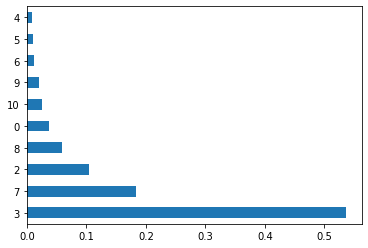

In [35]:
rf = RandomForestClassifier(n_estimators=20, random_state=33,n_jobs=-1 ,max_depth=5)
rf.fit(x_train, y_train)
rfP = rf.predict(x_test)

rfAS = accuracy_score(y_test, rfP)
rfaccuracy = rfAS*100
print (rfaccuracy)

#Feature importance
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
from sklearn.feature_selection import SelectFromModel
rf_sfm = SelectFromModel(rf, threshold=0.01)

rf_sfm = rf_sfm.fit(x_train, y_train)

X_important_train = rf_sfm.transform(x_train)
X_important_test = rf_sfm.transform(x_test)

In [37]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)

clf_importantP = clf_important.predict(X_important_test)

clf_importantAS = accuracy_score(y_test, clf_importantP)
clf_importantaccuracy = clf_importantAS*100
clf_importantaccuracy

52.552083333333336

In [72]:
#test_important_dftest = rf_sfm.transform(dft)


#randomtarget = clf_important.predict(test_important_dftest)

#randomtarget = encoder.inverse_transform(randomtarget)
#randomtarget = pd.DataFrame(randomtarget, columns = ['Cancel Reason'])
#randomtarget.to_csv("submissionrandommin.csv", index = False) 

In [73]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
decP = dec.predict(x_test)

decAS = accuracy_score(y_test, decP)
decaccuracy = decAS*100
decaccuracy

44.79166666666667

In [74]:
from lightgbm import LGBMClassifier
light = LGBMClassifier()
light.fit(x_train, y_train)
lightP = light.predict(x_test)

lightAS = accuracy_score(y_test, lightP)
lightaccuracy = lightAS*100
lightaccuracy

51.302083333333336

In [75]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knnP = knn.predict(x_test)

knnAS = accuracy_score(y_test, knnP)
knnaccuracy = knnAS*100
knnaccuracy

48.333333333333336

In [76]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svcP = svc.predict(x_test)

svcAS = accuracy_score(y_test, svcP)
svcaccuracy = svcAS*100
svcaccuracy

49.635416666666664

In [78]:
#Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= dec , step = 1) 
fit = rfe.fit(x_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 6
Selected Features: [False False False  True False  True False  True  True  True  True False]
Feature Ranking: [5 7 4 1 3 1 2 1 1 1 1 6]


In [79]:
# Transforming the data
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

# Fitting our baseline model with the transformed data
dec_rfe_model = dec.fit(x_train_rfe, y_train)

dec_rfeP = dec_rfe_model.predict(x_test_rfe)

dec_rfeAS = accuracy_score(y_test, dec_rfeP)
decrfeaccuracy = dec_rfeAS*100
decrfeaccuracy

41.822916666666664

In [80]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=33)
ada.fit(x_train, y_train)
adaP = ada.predict(x_test)

adaAS = accuracy_score(y_test, adaP)
adaaccuracy = adaAS*100
adaaccuracy

46.875

In [81]:
#Using Boosting model

from sklearn.ensemble import GradientBoostingClassifier

boostmodel = GradientBoostingClassifier()
boostmodel.fit(x_train, y_train)
boostmodelP = boostmodel.predict(x_test)

boostmodelAS = accuracy_score(y_test, boostmodelP)
boostaccuracy = boostmodelAS*100
boostaccuracy

50.520833333333336

In [82]:
#Hyperparameter Tuning

#RandomizedSearchCV

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 150, 250],
    'max_depth': [2, 3, 4, 8, 16, 32, None],
    'learning_rate': [0.03, 0.1, 0.3, 1]
}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(gbc, parameters, cv=5,n_iter=20)
rs.fit(x_train, y_train)

print_results(rs)

In [ ]:
#gridsearch
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [80, 90, 100, 125, 150],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': [0.03, 0.1, 0.3, 0.5]
}
cv = GridSearchCV(gbc, parameters, cv=5)
cv.fit(x_train, y_train)

print_results(cv)

cvP= cv.predict(x_test)

cvAS = accuracy_score(y_test, cvP)
cvaccuracy = cvAS*100
cvaccuracy